**Analysing Daily COVID-19 Testing in Ireland (April 1, 2020 – May 11, 2020)**

**Introduction & Data source**

I selected the COVID-19 Laboratory Testing Time Series dataset of Ireland, from April 1, 2020, to May 11, 2020, for this project. The dataset provides the daily count of COVID-19 tests in Ireland and is gathered from Ireland's official COVID-19 Data Hub, run by the Health Service Executive (HSE) and the Health Protection Surveillance Centre (HPSC).

**Dataset Source:** GeoHive COVID-19 Dashboard

**Dataset File:** COVID-19_Laboratory_Testing_Time_Series.csv

This dataset meets the project needs since it consists of day-to-day measurements for over 40 days, allowing us to perform nonseasonal time series analysis.


**Data Description:**


*   Time Frame: April 1, 2020 – May 11, 2020
*   Frequency: Daily observations
*   Number of Observations: 41 days



**Variables Included:**

* Date_HPSC: The specific date testing took place.

* Test24: Total number of COVID-19 tests conducted within the last 24 hours.

This dataset is nonseasonal since the testing process does not follow a fixed seasonal pattern. However, fluctuations in daily tests may be influenced by public health policies, outbreak severity, or testing capacity.

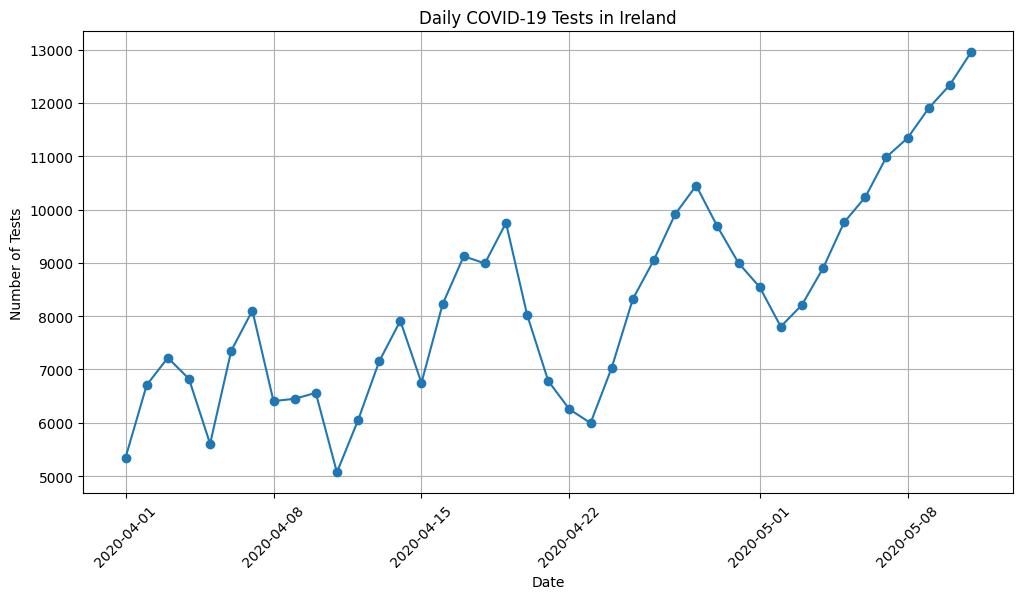

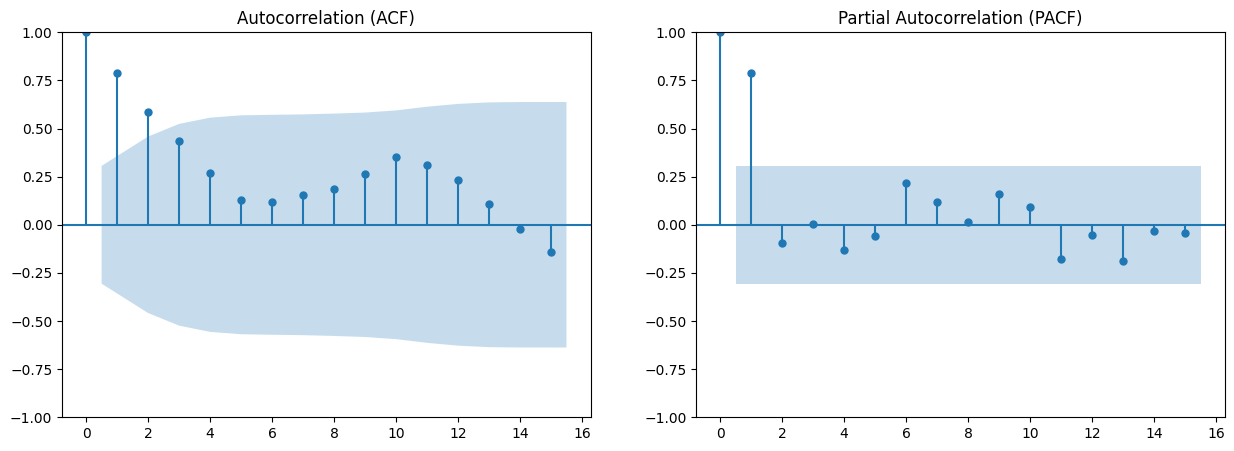


Next Steps:
- Perform stationarity tests (ADF test).
- Fit initial ARIMA and ETS models.
- Tune model parameters and validate performance.
- Forecast short-term testing trends.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta


start_date = datetime(2020, 4, 1)
dates = [start_date + timedelta(days=i) for i in range(41)]
test_counts = [5347, 6707, 7220, 6824, 5605, 7351, 8105, 6407, 6450, 6561,
               5070, 6048, 7152, 7913, 6748, 8223, 9125, 8990, 9750, 8024,
               6783, 6254, 5995, 7032, 8321, 9057, 9912, 10450, 9683, 8998,
               8547, 7804, 8211, 8900, 9763, 10234, 10987, 11342, 11903, 12340, 12950]


df = pd.DataFrame({'Date_HPSC': dates, 'Test24': test_counts})


df['Date_HPSC'] = pd.to_datetime(df['Date_HPSC'])


df.set_index('Date_HPSC', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(df['Test24'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.title('Daily COVID-19 Tests in Ireland')
plt.xticks(rotation=45)
plt.grid()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df['Test24'], ax=axes[0], lags=15)
plot_pacf(df['Test24'], ax=axes[1], lags=15)
axes[0].set_title('Autocorrelation (ACF)')
axes[1].set_title('Partial Autocorrelation (PACF)')
plt.show()


next_steps = """
Next Steps:
- Perform stationarity tests (ADF test).
- Fit initial ARIMA and ETS models.
- Tune model parameters and validate performance.
- Forecast short-term testing trends.
"""
print(next_steps)


**Observations from the Plot:**

* There are noticeable fluctuations in daily testing numbers.

* Some peaks and dips may correspond to changes in testing policies or public health interventions.

* There is no clear seasonal trend, confirming its suitability for nonseasonal time series analysis.

**Methodology for Analysis**

* **Exploratory Data Analysis (EDA)**

* Verifying for missing values and addressing any imbalance.

* Outlier detection that can explain spurious spikes or dips in testing.

* Visualization of trends and performing stationarity tests (e.g., ACF/PACF plots).

  







**Model Selection and Implementation**

I plan to utilise time series models for model estimation and forecasting numbers of COVID-19 tests:

* ETS: it explains the underlying trend and volatility.

* ARIMA: Can be utilised for nonseasonal forecasting by modelling trends and random fluctuations.

More advanced models such as VAR, VARMA, or VARMAX are employed if there are additional explanatory factors (e.g., hospital admissions).

  

**Forecasting and Model Evaluation**

* Train-Test Split: Model training based on prior data and prediction testing on later observations.    

*  Accuracy Metrics: Model comparison by RMSE, MAPE, and residual analysis.

* Future Projections: Forecasting the number of tests per day for a short-term predictive outcome.

  


